In [426]:
import cv2
import os
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import pandas as pd
import torch
from sklearn.metrics.pairwise import cosine_similarity

In [427]:
def prepareFeatureMatrix(image_directory_path ,image_files):
    feature_matrix = []
    sift = cv2.SIFT_create(nfeatures=64)
    for image_file in image_files:
        image_path = os.path.join(image_directory_path, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        keypoints, descriptors = sift.detectAndCompute(image, None)
        
        if descriptors is not None:
            feature_matrix.append(descriptors)
    return feature_matrix

In [438]:
def calculate_similarity(matcher, train_image, test_image):
    sift = cv2.SIFT_create()
    
    train_keypoint, train_descriptor = sift.detectAndCompute(train_image, None)
    test_keypoint, test_descriptor = sift.detectAndCompute(test_image, None)
    
    #matches = matcher.match(train_descriptor, test_descriptor)
    matches = matcher.knnMatch(train_descriptor, test_descriptor, k=2)
    #matches = sorted(matches, key=lambda x:x.distance)
    
    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]
    
    match_cnt = len(good_matches)
    total_keypoints = min(len(train_keypoint), len(test_keypoint))
    similarity_score = (match_cnt / total_keypoints) * 100
    
    #best_match = min(good_matches, key=lambda x: x.distance) if good_matches else None
    return similarity_score

In [439]:
train_data_path = "experiment/train_dataset"


train_image_files = [f for f in os.listdir(train_data_path)]
#train_feature_matrix = prepareFeatureMatrix(train_image_path, train_image_files)

In [440]:
#train_feature_matrix = np.vstack(train_feature_matrix)

In [441]:
test_data_path = "experiment/test_dataset"
test_image_files = [f for f in os.listdir(test_data_path)]


In [448]:
#matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matcher = cv2.BFMatcher()

match_result = []
for idx, test_image in enumerate(test_image_files):
    tmpscore_board = []
    test_image_path = test_data_path + '/' + test_image
    test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
    
    for train_image in train_image_files:
        train_image_path = train_data_path + '/' + train_image
        train_image = cv2.imread(train_image_path, cv2.IMREAD_GRAYSCALE)
        
        score = calculate_similarity(matcher, train_image, test_image)
        tmpscore_board.append(score)

    
    max_similar_idx, max_val = max(enumerate(tmpscore_board), key=lambda x: x[1])
    match_result.append([idx, max_similar_idx])
        


In [456]:
match_result
len(test_image_files)

4

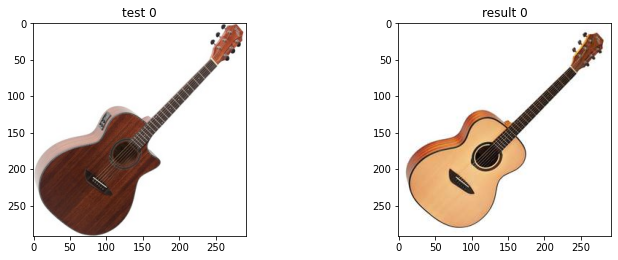

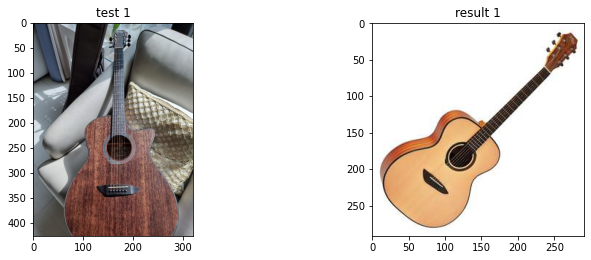

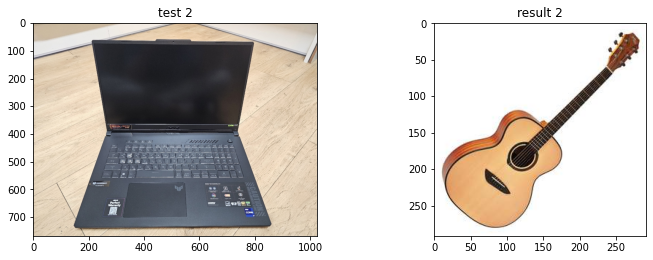

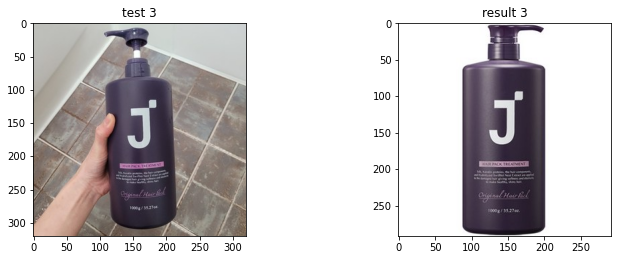

In [461]:
for i in range(len(test_image_files)):
    test_image_path = test_data_path + '/' + test_image_files[match_result[i][0]]
    train_image_path = train_data_path + '/' + train_image_files[match_result[i][1]]
    
    test_img = cv2.imread(test_image_path)
    train_img = cv2.imread(train_image_path)
    plt.figure(figsize=(12, 18))  # 그림 크기 설정
    
    plt.subplot(4, 2, 2*i+1)  # 1행 2열 중 첫 번째 그림
    plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
    plt.title(f'test {i}')

    plt.subplot(4, 2, 2*i+2)  # 1행 2열 중 두 번째 그림
    plt.imshow(cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB))
    plt.title(f'result {i}')